## Balance of Payments Analysis (2015-2023)

"""
*Countries Analyzed:* Germany, Spain, Sweden, Poland, Greece  
*Tools Used:* Python (`pandas`, `seaborn`, `matplotlib`)  
*Data Source:* IMF World Economic Outlook Database
"""

## Objective
 To analyze and compare the Balance of payments trends for thhe five European countries between 2015 and 2023, focusing on:
- Current Account Balance
- Trade Balance (Exports and Imports)
- Foreign Direct Investment (FDI) Inflows

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Load data
df=pd.read_excel("P_Data_Extract_From_World_Development_Indicators (1).xlsx")

In [2]:
# droppping rows  with missing values
df=df.dropna()

In [3]:
# renaming the columns
df.rename(columns={
    "Country Name": "Country",
    "Country Code": "Country_code",
    "Series Name": "Indicator",
    "Series Code": "Indicator_code"
}, inplace=True)

In [4]:
# indicating which columns are the year columns
year_columns = ['2015 [YR2015]', '2023 [YR2023]']

# melt to long format 
df_long = pd.melt(
    df,
    id_vars=['Country', 'Country_code', 'Indicator', 'Indicator_code'],
    value_vars=year_columns,
    var_name='year',
    value_name='value'
)

# cleaning the 'year' column
df_long['year']=df_long['year'].str.extract(r'(\d{4})').astype(int)
df_long

,Country,Country_code,Indicator,Indicator_code,year,value
0,Germany,DEU,"Current account balance (BoP, current US$)",BN.CAB.XOKA.CD,2015,2.773205e+11
1,Germany,DEU,Exports of goods and services (current US$),NE.EXP.GNFS.CD,2015,1.458592e+12
2,Germany,DEU,Imports of goods and services (current US$),NE.IMP.GNFS.CD,2015,1.204648e+12
3,Germany,DEU,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,2015,6.241899e+10
4,Germany,DEU,"Charges for the use of intellectual property, ...",BM.GSR.ROYL.CD,2015,1.011795e+10
5,Spain,ESP,"Current account balance (BoP, current US$)",BN.CAB.XOKA.CD,2015,2.456927e+10
6,Spain,ESP,Exports of goods and services (current US$),NE.EXP.GNFS.CD,2015,4.016370e+11
7,Spain,ESP,Imports of goods and services (current US$),NE.IMP.GNFS.CD,2015,3.652672e+11
8,Spain,ESP,"Foreign direct investment, net inflows (BoP, c...",BX.KLT.DINV.CD.WD,2015,2.377733e+10
9,Spain,ESP,"Charges for the use of intellectual property, ...",BM.GSR.ROYL.CD,2015,4.520612e+09


### ======== Current Account Balance =========

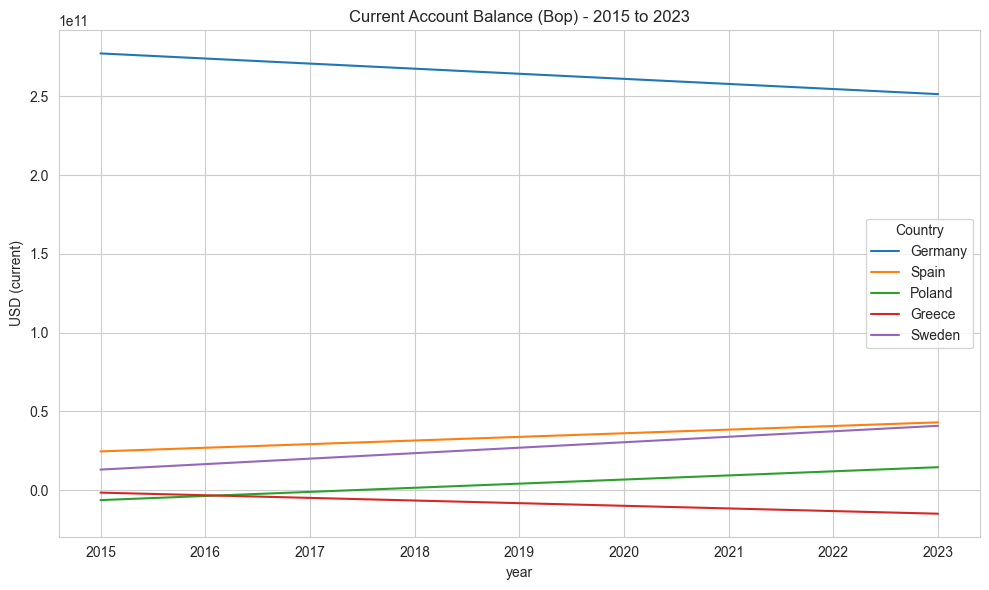

In [ ]:
# filtering for one indicator....current Account Balance
ca_df = df_long[df_long["Indicator"]== "Current account balance (BoP, current US$)"]

# sort by year and country
ca_df.sort_values(by=["Country", "year"])


# line plot of Trends
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=ca_df, x="year", y="value", hue="Country")
plt.title("Current Account Balance (Bop) - 2015 to 2023")
plt.ylabel("USD (current)")
plt.xlabel("year")
plt.grid(True)
plt.tight_layout()
plt.show()

### ======== Trade Balance =========

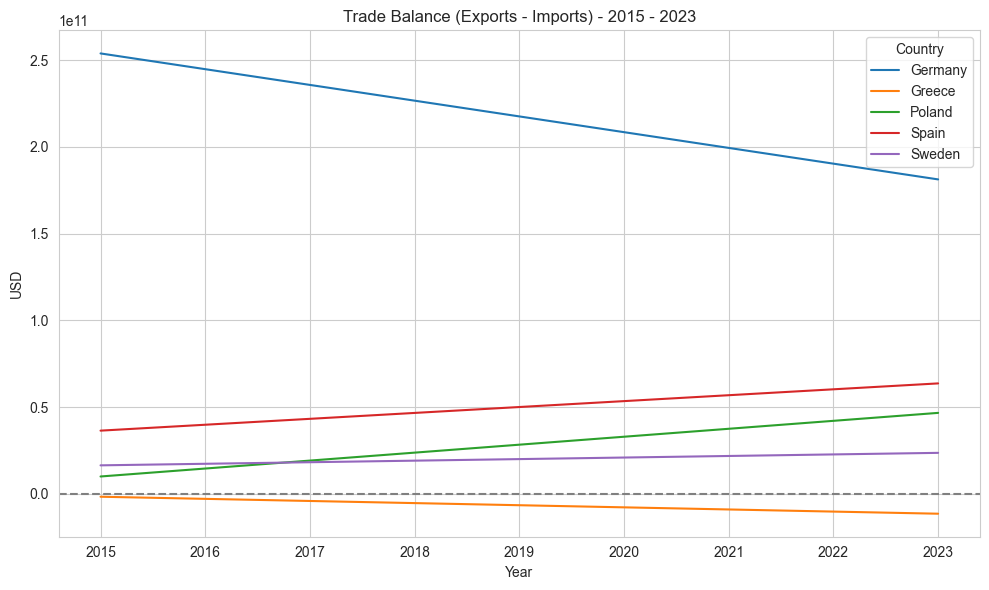

In [ ]:
# Extracting exports and imports rows
trade_df= df_long[df_long["Indicator"].isin(
    ["Exports of goods and services (current US$)",
    "Imports of goods and services (current US$)"])]

# Pivot to compare side by side
trade_pivot= trade_df.pivot_table(
    index=["Country", "year"],
    columns="Indicator",
    values="value"
).reset_index()

trade_pivot.columns.name = None # removing the multiindex

# renaming the new columns
trade_pivot.rename(columns={"Exports of goods and services (current US$)":"exports",
                            "Imports of goods and services (current US$)":"imports"}, inplace=True)

# Calculating the Trade Balance
trade_pivot["trade_balance"]=trade_pivot["exports"]-trade_pivot["imports"]
trade_pivot["trade_balance"]

# plotting Trade Balance
plt.figure(figsize=(10,6))
sns.lineplot(data=trade_pivot, x="year",y="trade_balance", hue="Country", markers="o")
plt.title("Trade Balance (Exports - Imports) - 2015 - 2023")
plt.xlabel("Year")
plt.ylabel("USD")
plt.axhline(0, color='grey', linestyle='--')
plt.grid(True)
plt.tight_layout()
plt.show()

### ========= FDI Inflows =========

<function matplotlib.pyplot.show(close=None, block=None)>

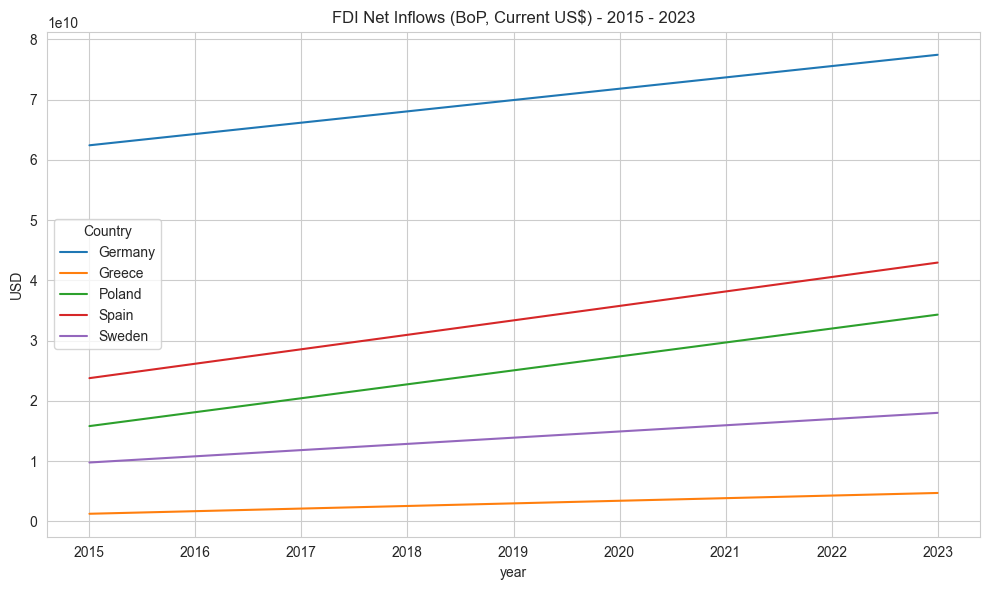

In [ ]:
# filter for FDI inflows only
fdi_df = df_long[df_long["Indicator"]=="Foreign direct investment, net inflows (BoP, current US$)"]
fdi_df=fdi_df.sort_values(by=["Country", "year"])


# plotting the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=fdi_df,
             x="year",
             y="value",
             hue="Country",
             markers="o")
plt.title("FDI Net Inflows (BoP, Current US$) - 2015 - 2023")
plt.xlabel("year")
plt.ylabel("USD")
plt.grid(True)
plt.tight_layout()
plt.show

### =========== Current Account Change Calculation =========

In [ ]:
ca_wide= ca_df.pivot(index="Country", columns="year", values="value")
ca_wide["change"]= ca_wide[2023] - ca_wide[2015]
ca_wide["% change"]= ca_wide[2023] / ca_wide[2015]*100
ca_wide = ca_wide.round(2)
print("\nCurrent Account Change (2015 - 2023):")
print(ca_wide)


Current Account Change (2015 - 2023):
year             2015          2023        change  % change
Country                                                    
Germany  2.773205e+11  2.514791e+11 -2.584138e+10     90.68
Greece  -1.611392e+09 -1.500754e+10 -1.339615e+10    931.34
Poland  -6.363000e+09  1.453500e+10  2.089800e+10   -228.43
Spain    2.456927e+10  4.301248e+10  1.844321e+10    175.07
Sweden   1.301325e+10  4.081896e+10  2.780571e+10    313.67


### ======== FDI Change Calculation ========

In [ ]:
fdi_wide=fdi_df.pivot(index="Country",
                      columns="year",
                      values="value")
fdi_wide["change"] = fdi_wide[2023] - fdi_wide[2015]
fdi_wide["% change"] = (fdi_wide["change"] / fdi_wide[2015])*100
fdi_wide=fdi_wide.round(2)
# print("FDI Change (2015 - 2023):")
print(fdi_wide)

year             2015          2023        change  % change
Country                                                    
Germany  6.241899e+10  7.743896e+10  1.501996e+10     24.06
Greece   1.268939e+09  4.722067e+09  3.453128e+09    272.13
Poland   1.582000e+10  3.431600e+10  1.849600e+10    116.92
Spain    2.377733e+10  4.295307e+10  1.917574e+10     80.65
Sweden   9.777569e+09  1.801640e+10  8.238830e+09     84.26



## Final Thoughts
#
 This project provided a hands-on analysis of real-world macroeconomic data using python.
 By exploring current Account balances, Trade performance, and FDI inflows from 2015 to 2023,
 we uncovered meaningful economic trends across Germany, Spain, Sweden, Poland, and Greece.
#
 Poland and Sweden emerged as fast risers in both trade and investment appeal, 
 while Germany maintained dominance in absolute terms.
 Greece, despite attracting more foreign investment, still faces economic headwinds
 reflected in its widening current account deficit.
#
 This kind of Data-driven analysis is crucial fro understanding the evolving financial health 
 and competitiveness of nations - and a great way to practice applied data analytics.
